# Your first join

Throughout this course, you'll be working with the countries database, which contains information about the most populous world cities in the world, along with country-level economic, population, and geographic data. The database also contains information on languages spoken in each country.

You can see the different tables in this database to get a sense of what they contain by clicking on the corresponding tabs. Click through them and familiarize yourself with the fields that seem to be shared across tables before you continue with the course.

In this exercise, you'll use the cities and countries tables to build your first inner join.

In [ ]:
#Select name fields (with alias) and region
SELECT cities.name AS city, countries.name AS country, region
FROM cities
INNER JOIN countries
ON cities.country_code = countries.code;

# Joining with aliased tables
Recall from the video that instead of writing full table names in queries, you can use table aliasing as a shortcut. The alias can be used in other parts of your query, such as the SELECT statement!

You also learned that when you SELECT fields, a field can be ambiguous. For example, imagine two tables, apples and oranges, both containing a column called color. You need to use the syntax apples.color or oranges.color in your SELECT statement to point SQL to the correct table. Without this, you would get the following error:

  column reference "color" is ambiguous
In this exercise, you'll practice joining with aliased tables. You'll use data from both the countries and economies tables to examine the inflation rate in 2010 and 2015.

When writing joins, many SQL users prefer to write the SELECT statement after writing the join code, in case the SELECT statement requires using table aliases.

In [ ]:
#Select fields with aliases
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
-- Join to economies (alias e)
INNER JOIN economies AS e
-- Match on code field using table aliases
ON c.code = e.code;

# USING in action
In the previous exercises, you performed your joins using the ON keyword. Recall that when both the field names being joined on are the same, you can take advantage of the USING clause.

You'll now explore the languages table from our database. Which languages are official languages, and which ones are unofficial?

You'll employ USING to simplify your query as you explore this question.

In [ ]:
SELECT c.name AS country, l.name AS language, official
FROM countries AS c
INNER JOIN languages AS l
-- Match using the code column
USING(code);

#Relationships in our database
Now that you know more about the different types of relationships that can exist between tables, it's time to examine a few relationships in the countries database!

To answer questions about table relationships, you can explore the tables displayed as tabs in your console.

#Inspecting a relationship
You've just identified that the countries table has a many-to-many relationship with the languages table. That is, many languages can be spoken in a country, and a language can be spoken in many countries.

This exercise looks at each of these in turn. First, what is the best way to query all the different languages spoken in a country? And second, how is this different from the best way to query all the countries that speak each language?

Recall that when writing joins, many users prefer to write SQL code out of order by writing the join first (along with any table aliases), and writing the SELECT statement at the end.

In [ ]:
#Select language and country names, aliased
SELECT l.name AS language, c.name AS country
FROM countries AS c
INNER JOIN languages AS l
USING(code)
-- Order the results by language
ORDER BY language;

#Joining multiple tables
You've seen that the ability to combine multiple joins using a single query is a powerful feature of SQL.

Suppose you are interested in the relationship between fertility and unemployment rates. Your task in this exercise is to join tables to return the country name, year, fertility rate, and unemployment rate in a single result from the countries, populations and economies tables.

In [ ]:
SELECT name, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
-- Join to economies (as e)
INNER JOIN economies AS e
-- Match on country code
ON c.code = e.code;

# Checking multi-table joins
Have a look at the results for Albania from the previous query below. You can see that the 2015 fertility_rate has been paired with 2010 unemployment_rate, and vice versa.

```
name	year	fertility_rate	unemployment_rate
Albania	2015	1.663           	17.1
Albania	2010	1.663	             14
Albania	2015	1.793	            17.1
Albania	2010	1.793	            14
```
Instead of four records, the query should return two: one for each year. The last join was performed on c.code = e.code, without also joining on year. Your task in this exercise is to fix your query by explicitly stating that both the country code and year should match!

In [ ]:
SELECT name, e.year, fertility_rate, unemployment_rate
FROM countries AS c
INNER JOIN populations AS p
ON c.code = p.country_code
INNER JOIN economies AS e
ON c.code = e.code
-- Add an additional joining condition such that you are also joining on year
	AND e.year = p.year;

#Remembering what is LEFT
To become faster at writing queries, it's helpful to memorize their structure. In this exercise, you will reconstruct the order of the steps of LEFT JOIN from memory!

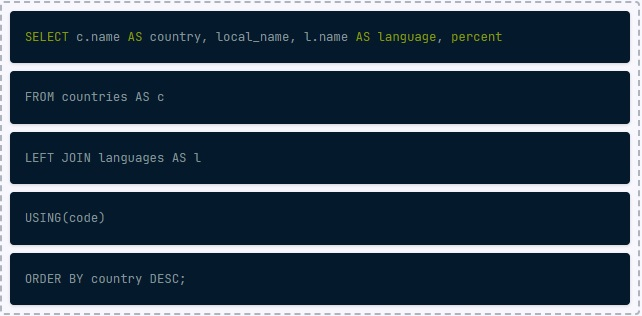

#This is a LEFT JOIN, right?
Nice work getting to grips with the structure of joins! In this exercise, you'll explore the differences between INNER JOIN and LEFT JOIN. This will help you decide which type of join to use.

As before, you will be using the cities and countries tables.

You'll begin with an INNER JOIN with the cities table (left) and countries table (right). This helps if you are interested only in records where a country is present in both tables.

You'll then change to a LEFT JOIN. This helps if you're interested in returning all countries in the cities table, whether or not they have a match in the countries table.

In [ ]:
SELECT
	c1.name AS city,
    code,
    c2.name AS country,
    region,
    city_proper_pop
FROM cities AS c1
-- Join right table (with alias)
LEFT JOIN countries AS c2
ON c1.country_code = c2.code
ORDER BY code DESC;

#Building on your LEFT JOIN
You'll now revisit the use of the AVG() function introduced in a previous course.

Being able to build more than one SQL function into your query will enable you to write compact, supercharged queries.

You will use AVG() in combination with a LEFT JOIN to determine the average gross domestic product (GDP) per capita by region in 2010.

In [ ]:
SELECT region, AVG(gdp_percapita) AS avg_gdp
FROM countries AS c
LEFT JOIN economies AS e
USING(code)
WHERE year = 2010
GROUP BY region
-- Order by descending avg_gdp
ORDER BY avg_gdp DESC
-- Return only first 10 records
LIMIT 10;

#Is this RIGHT?
You learned that right joins are not used as commonly as left joins. A key reason for this is that right joins can always be re-written as left joins, and because joins are typically typed from left to right, joining from the left feels more intuitive when constructing queries.

It can be tricky to wrap one's head around when left and right joins return equivalent results. You'll explore this in this exercise!

In [ ]:
SELECT countries.name AS country, languages.name AS language, percent
FROM languages
RIGHT JOIN countries
USING(code)
ORDER BY language;

#Comparing joins
In this exercise, you'll examine how results can differ when performing a full join compared to a left join and inner join by joining the countries and currencies tables. You'll be focusing on the North American region and records where the name of the country is missing.

You'll begin with a full join with countries on the left and currencies on the right. Recall the workings of a full join with the diagram below!
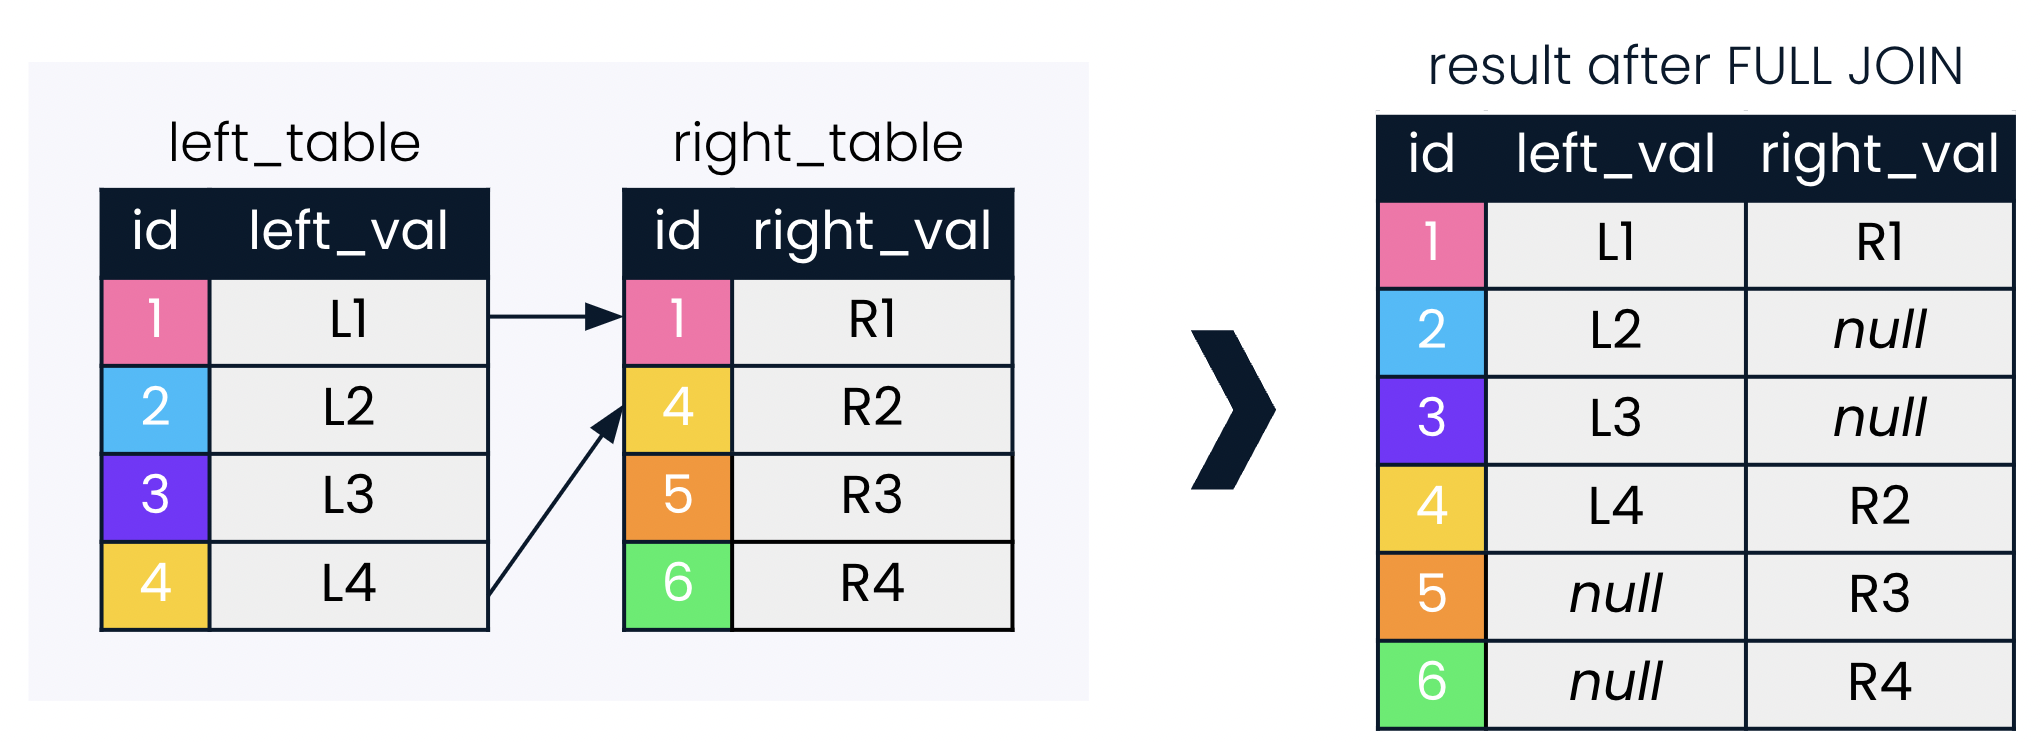

In [ ]:
SELECT name AS country, code, region, basic_unit
FROM countries
-- Join to currencies
INNER JOIN currencies
USING (code)
WHERE region = 'North America'
	OR name IS NULL
ORDER BY region;

#Chaining FULL JOINs
As you have seen in the previous chapter on INNER JOIN, it is possible to chain joins in SQL, such as when looking to connect data from more than two tables.

Suppose you are doing some research on Melanesia and Micronesia, and are interested in pulling information about languages and currencies into the data we see for these regions in the countries table. Since languages and currencies exist in separate tables, this will require two consecutive full joins involving the countries, languages and currencies tables.

In [ ]:
SELECT
	c1.name AS country,
    region,
    l.name AS language,
	basic_unit,
    frac_unit
FROM countries as c1
-- Full join with languages (alias as l)
FULL JOIN languages as l
USING(code)
-- Full join with currencies (alias as c2)
FULL JOIN currencies AS c2
USING(code)
WHERE region LIKE 'M%esia';

#Histories and languages
Well done getting to know all about CROSS JOIN! As you have learned, CROSS JOIN can be incredibly helpful when asking questions that involve looking at all possible combinations or pairings between two sets of data.

Imagine you are a researcher interested in the languages spoken in two countries: Pakistan and India. You are interested in asking:

What are the languages presently spoken in the two countries?
Given the shared history between the two countries, what languages could potentially have been spoken in either country over the course of their history?
In this exercise, we will explore how INNER JOIN and CROSS JOIN can help us answer these two questions, respectively.

In [ ]:
SELECT c.name AS country, l.name AS language
FROM countries AS c
-- Perform a cross join to languages (alias as l)
CROSS JOIN languages AS l
WHERE c.code in ('PAK','IND')
	AND l.code in ('PAK','IND');

#Choosing your join
Now that you're fully equipped to use joins, try a challenge problem to test your knowledge!

You will determine the names of the five countries and their respective regions with the lowest life expectancy for the year 2010. Use your knowledge about joins, filtering, sorting and limiting to create this list!

In [ ]:
SELECT
	c.name AS country,
    region,
    life_expectancy AS life_exp
FROM countries AS c
-- Join to populations (alias as p) using an appropriate join
LEFT JOIN populations AS p
ON c.code = p.country_code
-- Filter for only results in the year 2010
WHERE year = 2010
-- Order by life_exp
ORDER BY life_exp
-- Limit to five records
LIMIT 5;

#Comparing a country to itself
Self joins are very useful for comparing data from one part of a table with another part of the same table. Suppose you are interested in finding out how much the populations for each country changed from 2010 to 2015. You can visualize this change by performing a self join.

In this exercise, you'll work to answer this question by joining the populations table with itself. Recall that, with self joins, tables must be aliased. Use this as an opportunity to practice your aliasing!

Since you'll be joining the populations table to itself, you can alias populations first as p1 and again as p2. This is good practice whenever you are aliasing tables with the same first letter.

In [ ]:
SELECT
	p1.country_code,
    p1.size AS size2010,
    p2.size AS size2015
FROM populations AS p1
INNER JOIN populations AS p2
USING(country_code)
WHERE p1.year = 2010
-- Filter such that p1.year is always five years before p2.year
    AND p1.year = p2.year - 5;

#All joins on deck
Excellent work! You've made it to the end of the chapter. In this exercise, you will test your knowledge on all the joins you've learned so far.

For each of the problems presented, think carefully about what types of tables are involved and how each of the joins you have learned relates to NULL values.
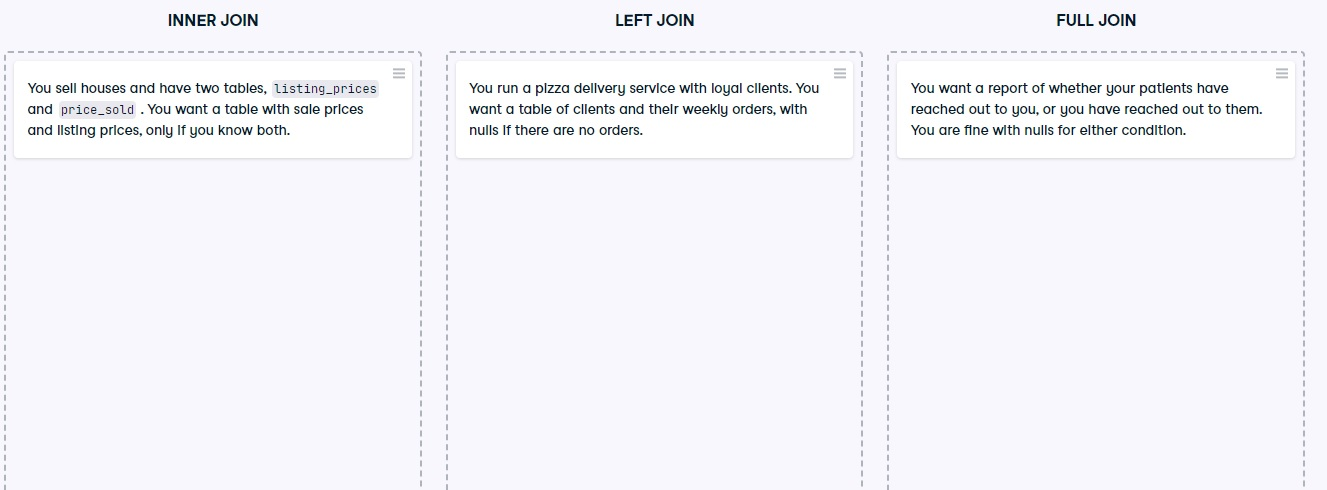

#Comparing global economies
Are you ready to perform your first set operation?

In this exercise, you have two tables, economies2015 and economies2019, available to you under the tabs in the console. You'll perform a set operation to stack all records in these two tables on top of each other, excluding duplicates.

When drafting queries containing set operations, it is often helpful to write the queries on either side of the operation first, and then call the set operator. The instructions are ordered accordingly.

In [ ]:
SELECT *
FROM economies2015
-- Set operation
UNION
-- Select all fields from economies2019
SELECT *
FROM economies2019
ORDER BY code, year;

#Comparing two set operations
You learned in the video exercise that UNION ALL returns duplicates, whereas UNION does not. In this exercise, you will dive deeper into this, looking at cases for when UNION is appropriate compared to UNION ALL.

You will be looking at combinations of country code and year from the economies and populations tables.

In [ ]:
SELECT code, year
FROM economies
-- Set theory clause
UNION ALL
SELECT country_code, year
FROM populations
ORDER BY code, year;

#INTERSECT
Well done getting through the material on INTERSECT!

Let's say you are interested in those countries that share names with cities. Use this task as an opportunity to show off your knowledge of set theory in SQL!

In [ ]:
-- Return all cities with the same name as a country
SELECT name
FROM cities
INTERSECT
SELECT name
FROM countries;

#You've got it, EXCEPT...
Just as you were able to leverage INTERSECT to find the names of cities with the same names as countries, you can also do the reverse, using EXCEPT.

In this exercise, you will find the names of cities that do not have the same names as their countries.

In [ ]:
-- Return all cities that do not have the same name as a country
SELECT name
FROM cities
EXCEPT
SELECT name
FROM countries
ORDER BY name;

#Multiple WHERE clauses
You've learned about semi joins in the form of nested subqueries within the WHERE clause of the main query. In this exercise, you'll familiarize yourself with semi join syntax by thinking through and re-ordering the lines of code provided. Note that subqueries are queries in their own right, so they can have a WHERE clause of their own! This is why you see two WHERE statements here.

Your task is to construct a semi join that pulls all records from economies2019 where gross_savings in the economies2015 table were below the 2015 global average. The global average gross_savings in 2015 was 22.5, and is already pre-calculated in the lines of code provided.
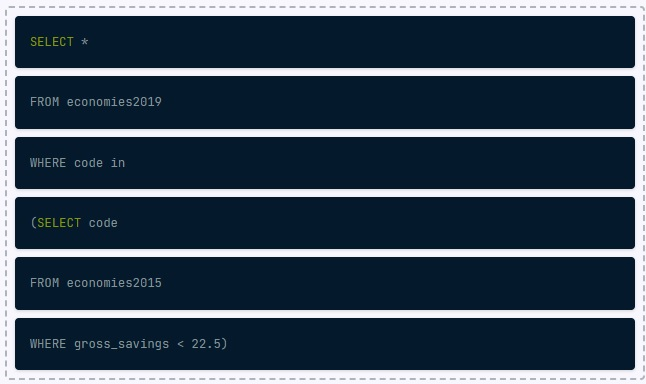

#Semi join
Great job getting acquainted with semi joins and anti joins! You are now going to practice using semi joins.

Let's say you are interested in identifying languages spoken in the Middle East. The languages table contains information about languages and countries, but it does not tell you what region the countries belong to. You can build up a semi join by filtering the countries table by a particular region, and then using this to further filter the languages table.

You'll build up your semi join as you did in the video exercise, block by block, starting with a selection of countries from the countries table, and then leveraging a WHERE clause to filter the languages table by this selection.

In [ ]:
SELECT DISTINCT name
FROM languages
-- Add syntax to use bracketed subquery below as a filter
WHERE code IN
  (SELECT code
  FROM countries
  WHERE region = 'Middle East')
ORDER BY name;

#Diagnosing problems using anti join
Nice work on semi joins! The anti join is a related and powerful joining tool. It can be particularly useful for identifying whether an incorrect number of records appears in a join.

Say you are interested in identifying currencies of Oceanian countries. You have written the following INNER JOIN, which returns 15 records. Now, you want to ensure that all Oceanian countries from the countries table are included in this result. You'll do this in the first step.
```
SELECT c1.code, name, basic_unit AS currency
FROM countries AS c1
INNER JOIN currencies AS c2
ON c1.code = c2.code
WHERE c1.continent = 'Oceania';
```
If there are any Oceanian countries excluded in this INNER JOIN, you want to return the names of these countries. You'll write an anti join to this in the second step!

In [ ]:
SELECT code, name
FROM countries
WHERE continent = 'Oceania'
-- Filter for countries not included in the bracketed subquery
  AND code NOT IN
    (SELECT code
    FROM currencies);

#Subquery inside WHERE
The video pointed out that subqueries inside WHERE can either be from the same table or a different table. In this exercise, you will nest a subquery from the populations table inside another query from the same table, populations. Your goal is to figure out which countries had high average life expectancies in 2015.

You can use SQL to do calculations for you. Suppose you only want records from 2015 with life_expectancy above 1.15 * avg_life_expectancy. You could use the following SQL query.
```
SELECT *
FROM populations
WHERE life_expectancy > 1.15 * avg_life_expectancy
  AND year = 2015;
```
In the first step, you'll write a query to calculate a value for avg_life_expectancy. In the second step, you will nest this calculation into another query.

In [ ]:
SELECT *
FROM populations
-- Filter for only those populations where life expectancy is 1.15 times higher than average
WHERE life_expectancy > 1.15 *
  (SELECT AVG(life_expectancy)
   FROM populations
   WHERE year = 2015)
    AND year = 2015;

#WHERE do people live?
In this exercise, you will strengthen your knowledge of subquerying by identifying capital cities in order of largest to smallest population.

Follow the instructions below to get the urban area population for capital cities only. You'll use the countries and cities tables displayed in the console to help identify columns of interest as you build your query.

In [ ]:
-- Select relevant fields from cities table
SELECT name, country_code, urbanarea_pop
FROM cities
-- Filter using a subquery on the countries table
WHERE name IN
  (SELECT capital
   FROM countries)
ORDER BY urbanarea_pop DESC;

#Subquery inside SELECT
As explored in the video, there are often multiple ways to produce the same result in SQL. You saw that subqueries can provide an alternative to joins to obtain the same result.

In this exercise, you'll go further in exploring how some queries can be written using either a join or a subquery.

In Step 1, you'll begin with a LEFT JOIN combined with a GROUP BY to select the nine countries with the most cities appearing in the cities table, along with the counts of these cities. In Step 2, you'll write a query that returns the same result as the join, but leveraging a nested query instead.

In [ ]:
SELECT countries.name AS country,
-- Subquery that provides the count of cities
  (SELECT COUNT(*)
   FROM cities
   WHERE cities.country_code = countries.code) AS cities_num
FROM countries
ORDER BY cities_num DESC, country
LIMIT 9;

#Subquery inside FROM
Subqueries inside FROM can help select columns from multiple tables in a single query.

Say you are interested in determining the number of languages spoken for each country. You want to present this information alongside each country's local_name, which is a field only present in the countries table and not in the languages table. You'll use a subquery inside FROM to bring information from these two tables together!

In [ ]:
#Select local_name and lang_num from appropriate tables
SELECT local_name, sub.lang_num
FROM countries,
    (SELECT code, COUNT(*) AS lang_num
     FROM languages
     GROUP BY code) AS sub
-- Where codes match
WHERE countries.code = sub.code
ORDER BY lang_num DESC;

#Subquery challenge
You're near the finish line! Test your understanding of subquerying with a challenge problem.

Suppose you're interested in analyzing inflation and unemployment rate for certain countries in 2015. You are not interested in countries with "Republic" or "Monarchy" as their form of government, but are interested in all other forms of government, such as emirate federations, socialist states, and commonwealths.

You will use the field gov_form to filter for these two conditions, which represents a country's form of government. You can review the different entries for gov_form in the countries table.

In [ ]:
SELECT code, inflation_rate, unemployment_rate
FROM economies
WHERE year = 2015
  AND code NOT IN
-- Subquery returning country codes filtered on gov_form
    (SELECT code
     FROM countries
     WHERE (gov_form LIKE '%Monarchy%' OR gov_form LIKE '%Republic%'))
ORDER BY inflation_rate;

#Final challenge
You've made it to the final challenge problem! Get ready to tackle this step-by-step.

Your task is to determine the top 10 capital cities in Europe and the Americas by city_perc, a metric you'll calculate. city_perc is a percentage that calculates the "proper" population in a city as a percentage of the total population in the wider metro area, as follows:

city_proper_pop / metroarea_pop * 100

Do not use table aliasing in this exercise.

In [ ]:
SELECT
	name,
    country_code,
    city_proper_pop,
    metroarea_pop,
    city_proper_pop / metroarea_pop * 100 AS city_perc
FROM cities
-- Use subquery to filter city name
WHERE name IN
  (SELECT capital
   FROM countries
   WHERE (continent = 'Europe'
   OR continent LIKE '%America'))
-- Add filter condition such that metroarea_pop does not have null values
	  AND metroarea_pop IS NOT NULL
-- Sort and limit the result
ORDER BY city_perc DESC
LIMIT 10;

## Thank you!